# I. Lý thuyết

1) Mạng tích chập CNN sẽ được thực hiện như thế nào?

A. Phân chia feature map thành các ma trận theo chiều channel và thực hiện tích chập giữa mỗi ma trận kernel với từng chiều.

B. Thực hiện phép nhân ma trận kernel với chuyển vị của ma trận local receptive field để thu được giá trị feature map output.

C. Tính trung bình các phân tử trên một ma trận local receptive field.

**D. Di chuyển vùng local receptive field theo chiều từ trái sang phải và từ trên xuống dưới và nhân tích chập với kernel để thu được ma trận feature map.**

2) Thực hiện phép nhân tích chập giữa ma trận đầu vào kích thước width và height lần lượt là $(W, H)$ với bộ lọc kích thước $(F, F)$ và bước nhảy $S$ thì thu được ma trận đầu ra với kích thước width và height $(W', H')$ là bao nhiêu? Hãy lựa chọn công thức tổng quát nhất.

A. $W' =⌊ \frac{W-F}{S} ⌋ + 1;~ H' =⌊ \frac{H-F}{S} ⌋ + 1$

B. $W' =\lceil \frac{W-F}{S} \rceil + 1;~ H' = \lceil \frac{H-F}{S} \rceil + 1$ 

**C. $W' =\lfloor \frac{W-F+2P}{S} \rfloor + 1;~ H' = \lfloor \frac{H-F+2P}{S} \rfloor + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.**

D. $W' =\lceil \frac{W-F+P}{S} \rceil + 1;~ H' = \lceil \frac{H-F+P}{S} \rceil + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

3) Mạng CNN sẽ học được những gì qua các layers?

A. Tại những layers đầu mỗi channels sẽ giúp phân biệt một loại đặc trưng, của vật thể. Những đặc trưng này sau đó được trải phẳng và đưa vào mạng MLP để phân loại vật thể.

B. Những layers cuối cùng sẽ zoom vào từng chi tiết của vật thể để phân loại vật thể.

**C. Tại những layers đầu mạng sẽ học được các đặc trưng chung như các edge dọc, ngang, chéo,.... Các đặc trưng chi tiết và tổng quát giúp nhận diện vật thể được học tại những layers cuối cùng.**

D. Các layers đầu tiên sẽ tập trung vào các chi tiết bộ phận của vật thể.

4) Kiến trúc chung của một mạng CNN là gì?

A. _[Conv -> BatchNorm -> Activation -> Maxpooling] x n_

B. _[BatchNorm -> Conv -> Activation -> Maxpooling] x n_ 

C. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n_ 

**D. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n -> Flatten -> [FullyConnected -> Activation] x m -> Softmax_**

5) Thông thường đặc điểm kích thước feature map của mạng neural sẽ như thế nào ?

A. Kích thước feature map tăng dần gấp đôi qua thời gian.

B. Kích thước feature map sẽ duy trì không đổi qua thời gian.

C. Kích thước mạng sẽ giảm dần gấp đôi sau mỗi một lần downsampling và sau đó tăng dần gấp đôi sau mỗi lần upsampling để khôi phục về kích thước ảnh input.

**D. Kích thước mạng thường giảm gấp đôi sau một lần downsampling và số lượng các filters tăng dần.**

# II. Thực hành

6) Thực hiện xây dựng và huấn luyện một mạng CNN ngẫu nhiên trên bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data). Lưu ý cần thực hiện [chuẩn hóa dữ liệu](https://github.com/pytorch/examples/issues/112) đối với bộ dữ liệu ImageNet trước khi huấn luyện.

7) Grid Search kiến trúc CNN dựa trên việc tổng quát hóa một thiết kế câu 6.

8) Huấn luyện lại mô hình bằng kiến trúc ResNet và MobileNet. Đánh giá chi phí tính toán và submit kết quả độ chính xác trên các ảnh thuộc folder test.

9) Thử nghiệm các phương pháp Augmentation như Flip, Rotation, Random Crop, Bright Contrast để cải thiện kết quả mô hình.

10) Lập bảng kết quả các thử nghiệm đã sử dụng.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Kaggle/CatVsDog')

In [ ]:
# !unzip "/content/drive/MyDrive/Kaggle/CatVsDog/dog-vs-cat-classification.zip" -d "/content/drive/MyDrive/Kaggle/CatVsDog/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.5499.jpg  
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.55.jpg  
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.550.jpg  
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.5500.jpg  
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.5501.jpg  
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.5502.jpg  
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.5503.jpg  
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.5504.jpg  
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.5505.jpg  
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.5506.jpg  
  inflating: /content/drive/MyDrive/Kaggle/CatVsDog/train/train/dogs/dog.5507.jpg  
  inflating: /content/drive/

In [ ]:
# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

# Other libraries we'll use
import numpy as np
import os
import random
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
import tqdm
import random
import glob

import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
print(device)

cuda


In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Kaggle/CatVsDog/train/train'
TEST_DIR = '/content/drive/MyDrive/Kaggle/CatVsDog/test/test'
train_images = glob.glob(TRAIN_DIR + "/**/**.jpg")
test_images = glob.glob(TEST_DIR + "/**.jpg")

In [ ]:
dog_list = [img for img in train_images if img.split("/")[-2] == 'dogs']
cat_list = [img for img in train_images if img.split("/")[-2] == 'cats']

print('Dog Iamges: ', len(dog_list))
print('Cat Iamges: ', len(cat_list))

class_to_int = {'dogs': 0, 'cats': 1}
int_to_class = {0: 'dogs', 1: 'cats'}

Dog Iamges:  12500
Cat Iamges:  12500


## 6. 
Thực hiện xây dựng và huấn luyện một mạng CNN ngẫu nhiên trên bộ dữ liệu Dog and Cat. Lưu ý cần thực hiện chuẩn hóa dữ liệu đối với bộ dữ liệu ImageNet trước khi huấn luyện.

## 9. 
Thử nghiệm các phương pháp Augmentation như Flip, Rotation, Random Crop, Bright Contrast để cải thiện kết quả mô hình.Thử nghiệm các phương pháp Augmentation như Flip, Rotation, Random Crop, Bright Contrast để cải thiện kết quả mô hình.

In [ ]:
def get_train_transform():
  return T.Compose([
    T.RandomHorizontalFlip(p = 0.5),
    T.RandomRotation(20),
    T.Resize((256, 256)),
    T.RandomResizedCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])
  
def get_val_transform():
  return T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])         
  ])


In [ ]:
from PIL import Image

class CatDogDataset(Dataset):
  def __init__(self, imgs, class_to_int, mode = "train", transforms = None):
    super().__init__()
    self.imgs = imgs
    self.class_to_int = class_to_int
    self.mode = mode
    self.transforms = transforms
  def __getitem__(self, idx):
    image_name = self.ims[idx]
    if self.mode == "train" or self.model == "val":
      img = Image.open(image_name)

      label = self.class_to_int(image_name.split("/")[-2])
      label = torch.tensor(label, dtype = torch.float32)

      img = self.transforms(img)
      return img, label
    elif self.model == "test":
      img = Image.open(image_name)
      img = self.transforms(img)
      return img, image_name
  def __len__(self):
    return len(self.imgs)

    

In [ ]:
train_imgs, val_imgs = train_test_split(train_images, test_size = 0.2)

In [ ]:
train_dataset = CatDogDataset(train_imgs, class_to_int, mode = "train", 
                              transforms = get_train_transform())

val_dataset = CatDogDataset(val_imgs, class_to_int, mode = "val", 
                              transforms = get_val_transform())

test_dataset = CatDogDataset(test_images, class_to_int, mode = "test", 
                              transforms = get_val_transform())

In [ ]:
train_data_loader = DataLoader(
    dataset = train_dataset,
    num_workers = 2, 
    batch_size = 32,
    shuffle = True
)    

val_data_loader = DataLoader(
    dataset = val_dataset,
    num_workers = 2, 
    batch_size = 16,
    shuffle = True
)   

train_data_loader = DataLoader(
    dataset = test_dataset,
    num_workers = 2, 
    batch_size = 1,
    shuffle = False
)   

In [ ]:
def accuracy(preds, trues):
  preds = [1 if preds[i] >= 0.5 else 0 for i in range(len(preds))]
  acc = [1 if preds[i] == trues[i] else 0 for i in range(len(preds))]
  accuracy = np.sum(acc) / len(preds)
  return accuracy * 100

In [ ]:
def train_one_epoch(train_data_loader, model, optimizer):
  epoch_loss = []
  epoch_acc = []
  start_time = time.time()
  model.to(device)
  model.train()

  for images, labels in train_data_loader:
    images = images.to(device)
    labels = labels.to(device)
    labels = labels.reshape((labels.shape[0], 1))

    optimizer.zero_grad()

    preds = model(images)

    _loss = criterion(preds, labels)
    loss = _loss.item()
    epoch_loss.append(loss)

    acc = accuracy(preds, labels)
    epoch_acc.append(acc)

    _loss.backward()
    optimizer.step()

  end_time = time.time()
  total_time = end_time - start_time

  epoch_loss = np.mean(epoch_loss)
  epoch_acc = np.mean(epoch_acc)

  train_logs['loss'].append(epoch_loss)
  train_logs['accuracy'].append(epoch_acc)
  train_logs['time'].append(total_time)

  return epoch_loss, epoch_acc, total_time

In [ ]:
def val_one_epoch(val_data_loader, model, best_val, acc, model_name):
  epoch_loss = []
  epoch_acc = []
  start_time = time.time()
  model.to(device)
  model.eval()

  for images, labels in val_data_loader:

    images = images.to(device)
    labels = labels.to(device)
    labels = labels.reshape((labels.shape[0], 1))

    preds = model(images)

    _loss = criterion(preds, labels)
    loss = _loss.item()
    epoch_loss.append(loss)

    acc = accuracy(preds, labels)
    epoch_acc.append(acc)

  end_time = time.time()
  total_time = end_time - start_time

  epoch_loss = np.mean(epoch_loss)
  epoch_acc = np.mean(epoch_acc)

  val_logs['loss'].append(epoch_loss)
  val_logs['accuracy'].append(epoch_acc)
  val_logs['time'].append(total_time)

  if epoch_acc > best_val_acc:
    best_val_acc = epoch_acc
    torch.save(model.state_dict(), model_name + '_best.pth')

  return epoch_loss, epoch_acc, total_time, best_val_acc

In [ ]:
class cnn(nn.Module):
  def __init__(self):
    super(cnn, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 128, kernel_size = 7, padding = 0, stride = 2),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(128, 256, kernel_size = 5, padding = 0, stride = 2),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(2)
    )
        
    self.layer3 = nn.Sequential(
        nn.Conv2d(256, 512, kernel_size = 3, padding = 0, stride = 2),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(2)
    )

    self.fc1 = nn.Linear(2048, 1000)
    self.dropout = nn.Dropout()
    self.fc2 = nn.Linear(1000, 1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.view(out.size(0), -1)
    out = self.relu(self.fc1(out))
    out = self.fc2(out)
    out = self.sigmoid(out)
    return out

In [ ]:
from torchvision import models
from torchsummary import summary

model = cnn()
model.to(device)
summary(model, (3, 224, 224), device = device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 128, 109, 109]          18,944
       BatchNorm2d-2        [-1, 128, 109, 109]             256
              ReLU-3        [-1, 128, 109, 109]               0
         MaxPool2d-4          [-1, 128, 54, 54]               0
            Conv2d-5          [-1, 256, 25, 25]         819,456
       BatchNorm2d-6          [-1, 256, 25, 25]             512
              ReLU-7          [-1, 256, 25, 25]               0
         MaxPool2d-8          [-1, 256, 12, 12]               0
            Conv2d-9            [-1, 512, 5, 5]       1,180,160
      BatchNorm2d-10            [-1, 512, 5, 5]           1,024
             ReLU-11            [-1, 512, 5, 5]               0
        MaxPool2d-12            [-1, 512, 2, 2]               0
           Linear-13                 [-1, 1000]       2,049,000
             ReLU-14                 [-

In [ ]:
print(model)

cnn(
  (layer1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(7, 7), stride=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2048, out_features=1000, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(i

In [ ]:
model.zero_grad()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.33)

criterion = nn.BCELoss()

train_logs = {'loss': [], 'accuracy': [], 'time': []}
val_logs = {'loss': [], 'accuracy': [], 'time': []}

model.to(device)

epochs = 15

In [ ]:
best_val_acc = 0
for epoch in range(epochs):
  loss, acc, _time  = train_one_epoch(train_data_loader, model, optimizer)
  
  # print epoch details
  print('\Training')
  print('Epoch {}'.format(epoch + 1))
  print('Loss: {}'.format(round(loss, 4)))
  print('Accuracy: {}'.format(round(acc, 4)))
  print('Time: {}'.format(round(_time, 4)))

  loss, acc, _time, best_val_acc = val_one_epoch(val_data_loader, model, best_val_acc, 'cat_vs_dog_model')

  # print epoch details

  print('\Validating')
  print('Epoch {}'.format(epoch + 1))
  print('Loss: {}'.format(round(loss, 4)))
  print('Accuracy: {}'.format(round(acc, 4)))
  print('Time: {}'.format(round(_time, 4)))

In [ ]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# SEED = 42
# random.seed(SEED)
# np.random.seed(SEED)
# torch.manual_seed(SEED)
# torch.cuda.manual_seed(SEED)
# torch.backends.cudnn.deterministic = True
# print(device)

cuda


In [ ]:
# # The images are in the data/shapes folder
# data_path = '/content/drive/MyDrive/Kaggle/CatVsDog/train/train'

# # Get the class names
# classes = os.listdir(data_path)
# classes.sort()
# print(len(classes), 'classes:')
# print(classes)

# # Show the first image in each folder
# fig = plt.figure(figsize=(8, 12))
# i = 0
# for sub_dir in os.listdir(data_path):
#     i+=1
#     img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
#     img_path = os.path.join(data_path, sub_dir, img_file)
#     img = mpimg.imread(img_path)
#     print('Size of image {} is: {}'.format(i, img.shape))
#     a=fig.add_subplot(1, len(classes),i)
#     a.axis('off')
#     imgplot = plt.imshow(img)
#     a.set_title(img_file)
# plt.show()

In [ ]:
# # Function to ingest data using training and test loaders
# def load_dataset(data_path, img_size):
#     # Load all of the images
#     transformation = transforms.Compose([
#         # transform to tensors
#         transforms.ToTensor(),
#         # Normalize the pixel values (in R, G, and B channels)
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                      std=[0.229, 0.224, 0.225]),
#         transforms.Resize(img_size)                            
                              
#     ])


#     # Load all of the images, transforming them
#     full_dataset = torchvision.datasets.ImageFolder(
#         root=data_path,
#         transform=transformation
#     )
    
    
#     # Split into training (70% and testing (30%) datasets)
#     train_size = int(0.7 * len(full_dataset))
#     test_size = len(full_dataset) - train_size
#     train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    
#     # define a loader for the training data we can iterate through in 50-image batches
#     train_loader = torch.utils.data.DataLoader(
#         train_dataset,
#         batch_size=50,
#         num_workers=0,
#         shuffle=False
#     )
    
#     # define a loader for the testing data we can iterate through in 50-image batches
#     test_loader = torch.utils.data.DataLoader(
#         test_dataset,
#         batch_size=50,
#         num_workers=0,
#         shuffle=False
#     )
        
#     return train_loader, test_loader

In [ ]:
# # Get the iterative dataloaders for test and training data
# train_loader, test_loader = load_dataset('/content/drive/MyDrive/Kaggle/CatVsDog/train/train', (300, 500))
# print('Data loaders ready')

Data loaders ready


In [ ]:
# # Create a neural net class
# class Net(nn.Module):
#     # Constructor
#     def __init__(self, num_classes=3):
#         super(Net, self).__init__()
        
#         # Our images are RGB, so input channels = 3. We'll apply 12 filters in the first convolutional layer
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        
#         # We'll apply max pooling with a kernel size of 2
#         self.pool = nn.MaxPool2d(kernel_size=2)
        
#         # A second convolutional layer takes 12 input channels, and generates 12 outputs
#         self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=1)
        
#         # A third convolutional layer takes 12 inputs and generates 24 outputs
#         self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        
#         # A drop layer deletes 20% of the features to help prevent overfitting
#         self.drop = nn.Dropout2d(p=0.2)
        
#         # Our 128x128 image tensors will be pooled twice with a kernel size of 2. 128/2/2 is 32.
#         # So our feature tensors are now 32 x 32, and we've generated 24 of them
#         # We need to flatten these and feed them to a fully-connected layer
#         # to map them to  the probability for each class
#         self.fc = nn.Linear(in_features=75 * 125 * 24, out_features=num_classes)

#     def forward(self, x):
#         # Use a relu activation function after layer 1 (convolution 1 and pool)
#         x = F.relu(self.pool(self.conv1(x)))
      
#         # Use a relu activation function after layer 2 (convolution 2 and pool)
#         x = F.relu(self.pool(self.conv2(x)))
        
#         # Select some features to drop after the 3rd convolution to prevent overfitting
#         x = F.relu(self.drop(self.conv3(x)))
        
#         # Only drop the features if this is a training pass
#         x = F.dropout(x, training=self.training)
        
#         # Flatten
#         x = x.view(-1, 75 * 125 * 24)
#         # x = x.view(x.size(0), -1)
#         # Feed to fully-connected layer to predict class
#         x = self.fc(x)
#         # Return log_softmax tensor 
#         return F.log_softmax(x, dim=1)
    
# print("CNN model class defined!")

CNN model class defined!


In [ ]:
# def train(model, device, train_loader, optimizer, epoch):
#     # Set the model to training mode
#     model.train()
#     train_loss = 0
#     print("Epoch:", epoch)
#     # Process the images in batches
#     for batch_idx, (data, target) in enumerate(train_loader):
#         # Use the CPU or GPU as appropriate
#         data, target = data.to(device), target.to(device)
        
#         # Reset the optimizer
#         optimizer.zero_grad()
        
#         # Push the data forward through the model layers
#         output = model(data)
        
#         # Get the loss
#         loss = loss_criteria(output, target)
        
#         # Keep a running total
#         train_loss += loss.item()
        
#         # Backpropagate
#         loss.backward()
#         optimizer.step()
        
#         # Print metrics for every 10 batches so we see some progress
#         if batch_idx % 10 == 0:
#             print('Training set [{}/{} ({:.0f}%)] Loss: {:.6f}'.format(
#                 batch_idx * len(data), len(train_loader.dataset),
#                 100. * batch_idx / len(train_loader), loss.item()))
            
#     # return average loss for the epoch
#     avg_loss = train_loss / (batch_idx+1)
#     print('Training set: Average loss: {:.6f}'.format(avg_loss))
#     return avg_loss
            
            
# def test(model, device, test_loader):
#     # Switch the model to evaluation mode (so we don't backpropagate or drop)
#     model.eval()
#     test_loss = 0
#     correct = 0
#     with torch.no_grad():
#         batch_count = 0
#         for data, target in test_loader:
#             batch_count += 1
#             data, target = data.to(device), target.to(device)
            
#             # Get the predicted classes for this batch
#             output = model(data)
            
#             # Calculate the loss for this batch
#             test_loss += loss_criteria(output, target).item()
            
#             # Calculate the accuracy for this batch
#             _, predicted = torch.max(output.data, 1)
#             correct += torch.sum(target==predicted).item()

#     # Calculate the average loss and total accuracy for this epoch
#     avg_loss = test_loss/batch_count
#     print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
#         avg_loss, correct, len(test_loader.dataset),
#         100. * correct / len(test_loader.dataset)))
    
#     # return average loss for the epoch
#     return avg_loss
    
    
# # Now use the train and test functions to train and test the model    

# device = "cpu"
# if (torch.cuda.is_available()):
#     # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
#     device = "cuda"
# print('Training on', device)

# # Create an instance of the model class and allocate it to the device
# model = Net(num_classes=len(classes)).to(device)

# # Use an "Adam" optimizer to adjust weights
# # (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Specify the loss criteria
# loss_criteria = nn.CrossEntropyLoss()

# # Track metrics in these arrays
# epoch_nums = []
# training_loss = []
# validation_loss = []

# # Train over 5 epochs (in a real scenario, you'd likely use many more)
# epochs = 5
# for epoch in range(1, epochs + 1):
#         train_loss = train(model, device, train_loader, optimizer, epoch)
#         test_loss = test(model, device, test_loader)
#         epoch_nums.append(epoch)
#         training_loss.append(train_loss)
#         validation_loss.append(test_loss)

Training on cpu
Epoch: 1
Training set [0/17500 (0%)] Loss: 0.688983
Training set [500/17500 (3%)] Loss: 0.720195
Training set [1000/17500 (6%)] Loss: 0.704026
Training set [1500/17500 (9%)] Loss: 0.678955
Training set [2000/17500 (11%)] Loss: 0.646952
Training set [2500/17500 (14%)] Loss: 0.659649
Training set [3000/17500 (17%)] Loss: 0.652543
Training set [3500/17500 (20%)] Loss: 0.589836
Training set [4000/17500 (23%)] Loss: 0.640613
Training set [4500/17500 (26%)] Loss: 0.679139
Training set [5000/17500 (29%)] Loss: 0.659204
Training set [5500/17500 (31%)] Loss: 0.644511
Training set [6000/17500 (34%)] Loss: 0.658940
Training set [6500/17500 (37%)] Loss: 0.529249
Training set [7000/17500 (40%)] Loss: 0.746643
Training set [7500/17500 (43%)] Loss: 0.670259
Training set [8000/17500 (46%)] Loss: 0.672511
Training set [8500/17500 (49%)] Loss: 0.656253
Training set [9000/17500 (51%)] Loss: 0.605160
Training set [9500/17500 (54%)] Loss: 0.512702
Training set [10000/17500 (57%)] Loss: 0.60

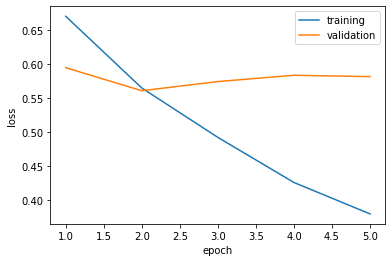

In [ ]:
# %matplotlib inline
# from matplotlib import pyplot as plt

# plt.plot(epoch_nums, training_loss)
# plt.plot(epoch_nums, validation_loss)
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend(['training', 'validation'], loc='upper right')
# plt.show()

Getting predictions from test set...


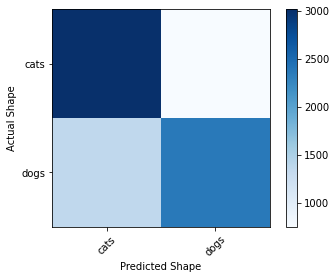

In [ ]:
# # Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
# from sklearn.metrics import confusion_matrix

# # Set the model to evaluate mode
# model.eval()

# # Get predictions for the test data and convert to numpy arrays for use with SciKit-Learn
# print("Getting predictions from test set...")
# truelabels = []
# predictions = []
# for data, target in test_loader:
#     for label in target.cpu().data.numpy():
#         truelabels.append(label)
#     for prediction in model.cpu()(data).data.numpy().argmax(1):
#         predictions.append(prediction) 

# # Plot the confusion matrix
# cm = confusion_matrix(truelabels, predictions)
# plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
# plt.colorbar()
# tick_marks = np.arange(len(classes))
# plt.xticks(tick_marks, classes, rotation=45)
# plt.yticks(tick_marks, classes)
# plt.xlabel("Predicted Shape")
# plt.ylabel("Actual Shape")
# plt.show()

In [ ]:
# !cd /content/drive/MyDrive/Kaggle/CatVsDog/

In [ ]:
# # Save the model weights
# model_file = '/dogvscat.pt'
# torch.save(model.state_dict(), model_file)
# del model
# print('model saved as', model_file)

model saved as /dogvscat.pt


In [ ]:
# import matplotlib.pyplot as plt
# import os
# from random import randint
# %matplotlib inline


# # Function to predict the class of an image
# def predict_image(classifier, image):
#     import numpy
    
#     # Set the classifer model to evaluation mode
#     classifier.eval()
    
#     # Apply the same transformations as we did for the training images
#     transformation = transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                      std=[0.229, 0.224, 0.225]),
#         transforms.Resize((300, 500))                            
#     ])

#     # Preprocess the image
#     image_tensor = transformation(image).float()

#     # Add an extra batch dimension since pytorch treats all inputs as batches
#     image_tensor = image_tensor.unsqueeze_(0)

#     # Turn the input into a Variable
#     input_features = Variable(image_tensor)

#     # Predict the class of the image
#     output = classifier(input_features)
#     index = output.data.numpy().argmax()
#     return index


# # Function to create a random image (of a square, circle, or triangle)
# def create_image (size, shape):
#     from random import randint
#     import numpy as np
#     from PIL import Image, ImageDraw
    
#     xy1 = randint(10,40)
#     xy2 = randint(60,100)
#     col = (randint(0,200), randint(0,200), randint(0,200))

#     img = Image.new("RGB", size, (255, 255, 255))
#     draw = ImageDraw.Draw(img)
    
#     if shape == 'circle':
#         draw.ellipse([(xy1,xy1), (xy2,xy2)], fill=col)
#     elif shape == 'triangle':
#         draw.polygon([(xy1,xy1), (xy2,xy2), (xy2,xy1)], fill=col)
#     else: # square
#         draw.rectangle([(xy1,xy1), (xy2,xy2)], fill=col)
#     del draw
    
#     return np.array(img)

# # Create a random test image
# classnames = os.listdir(os.path.join('train', 'train'))
# classnames.sort()
# shape = classnames[randint(0, len(classnames)-1)]
# img = create_image ((300,500), shape)

# # Display the image
# plt.axis('off')
# plt.imshow(img)

# # Create a new model class and load the saved weights
# model = Net()
# model.load_state_dict(torch.load(model_file))

# # Call the predction function
# index = predict_image(model, img)
# print(classes[index])